# **Part A**

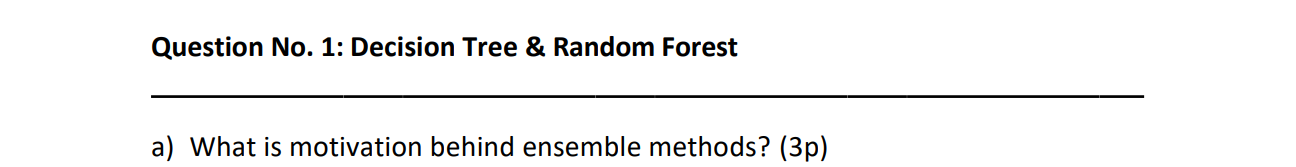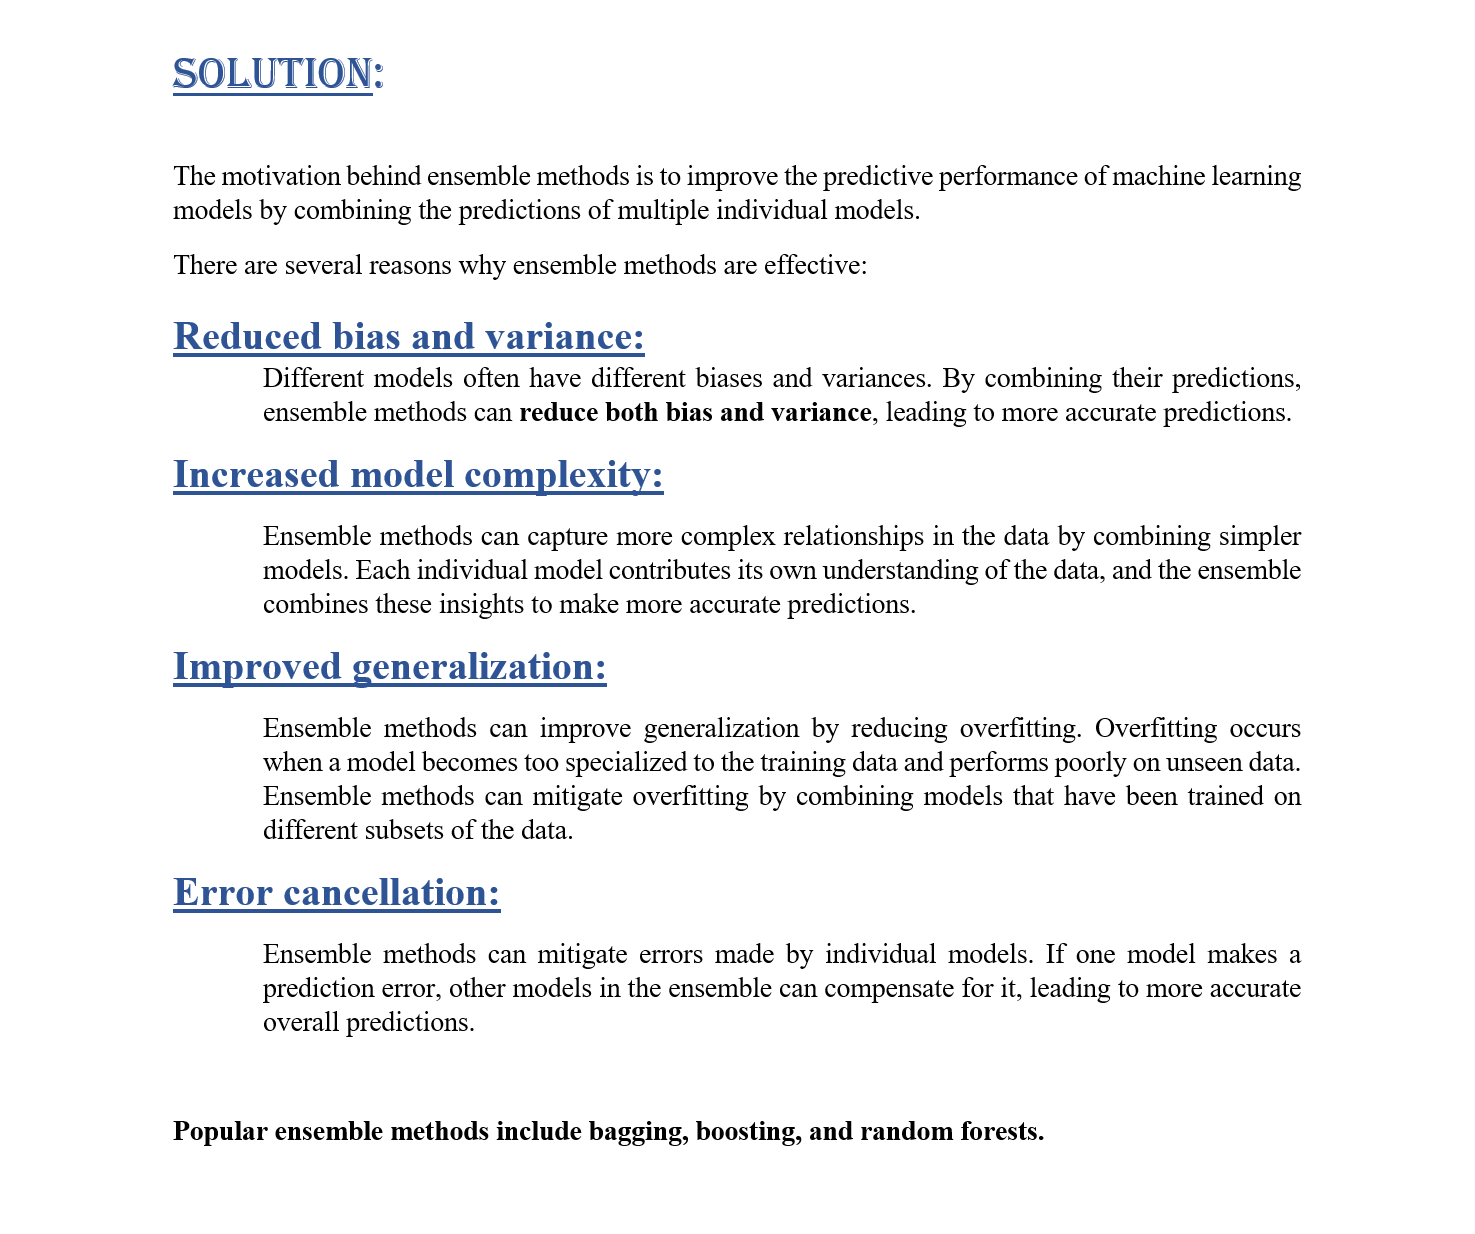

---

# **Part B**

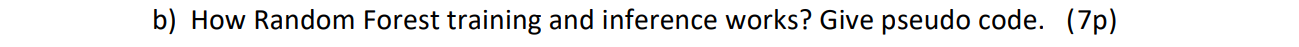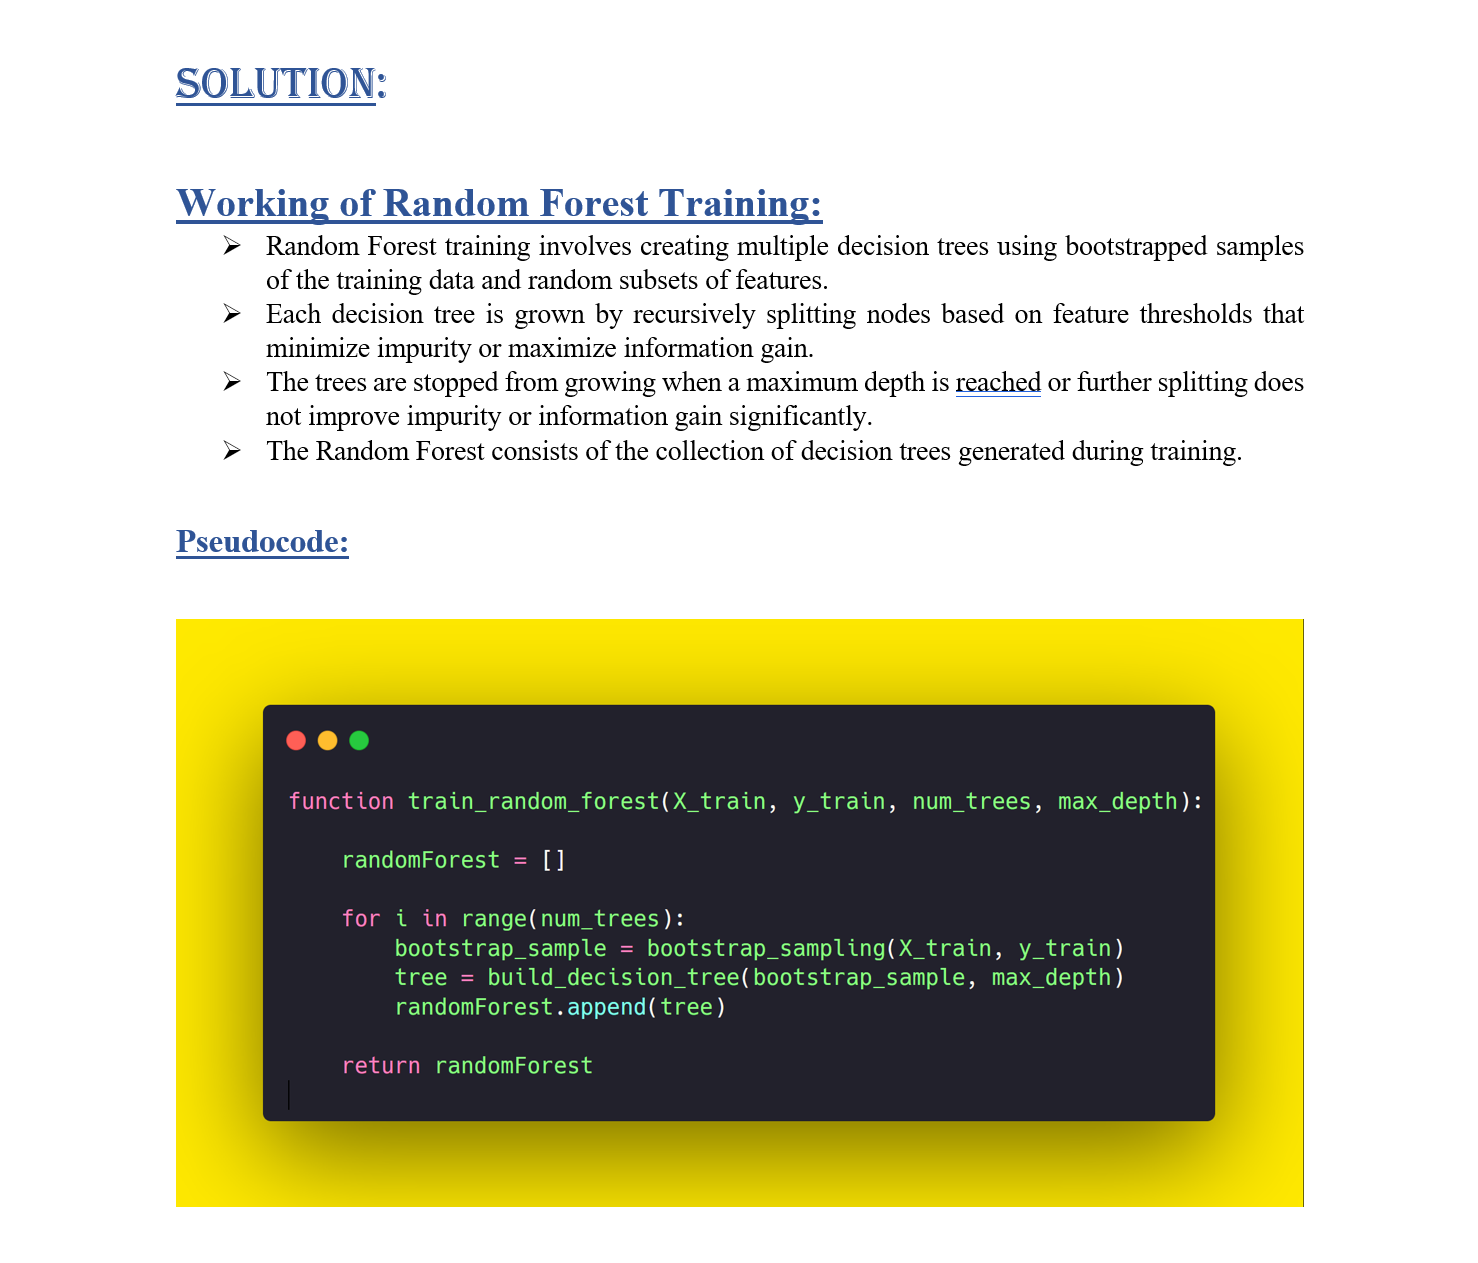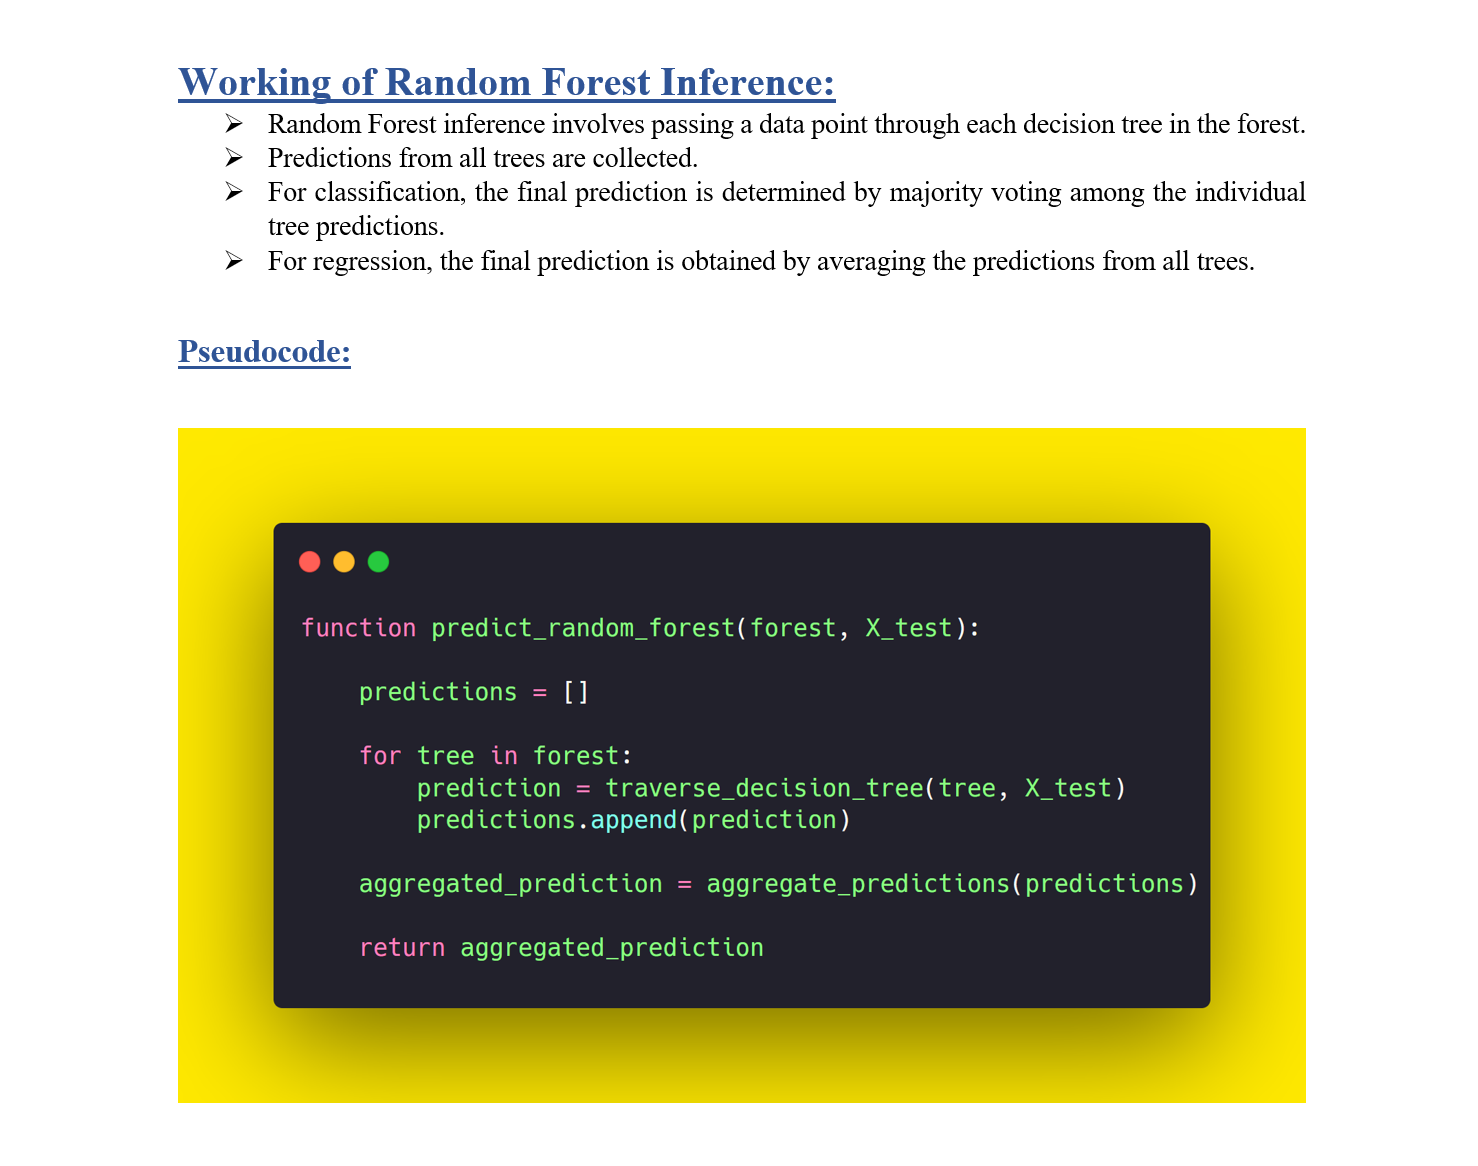

---

# **Part C**

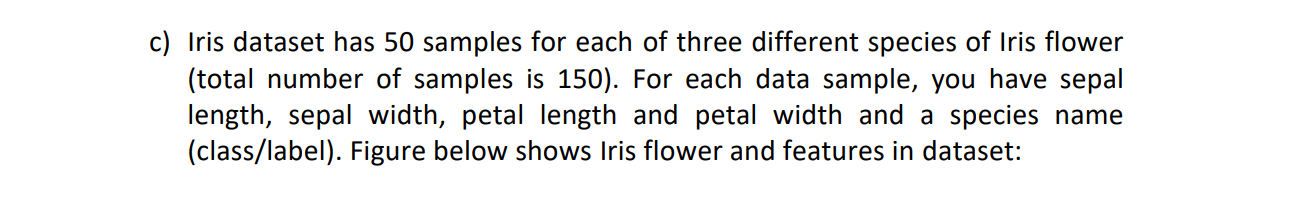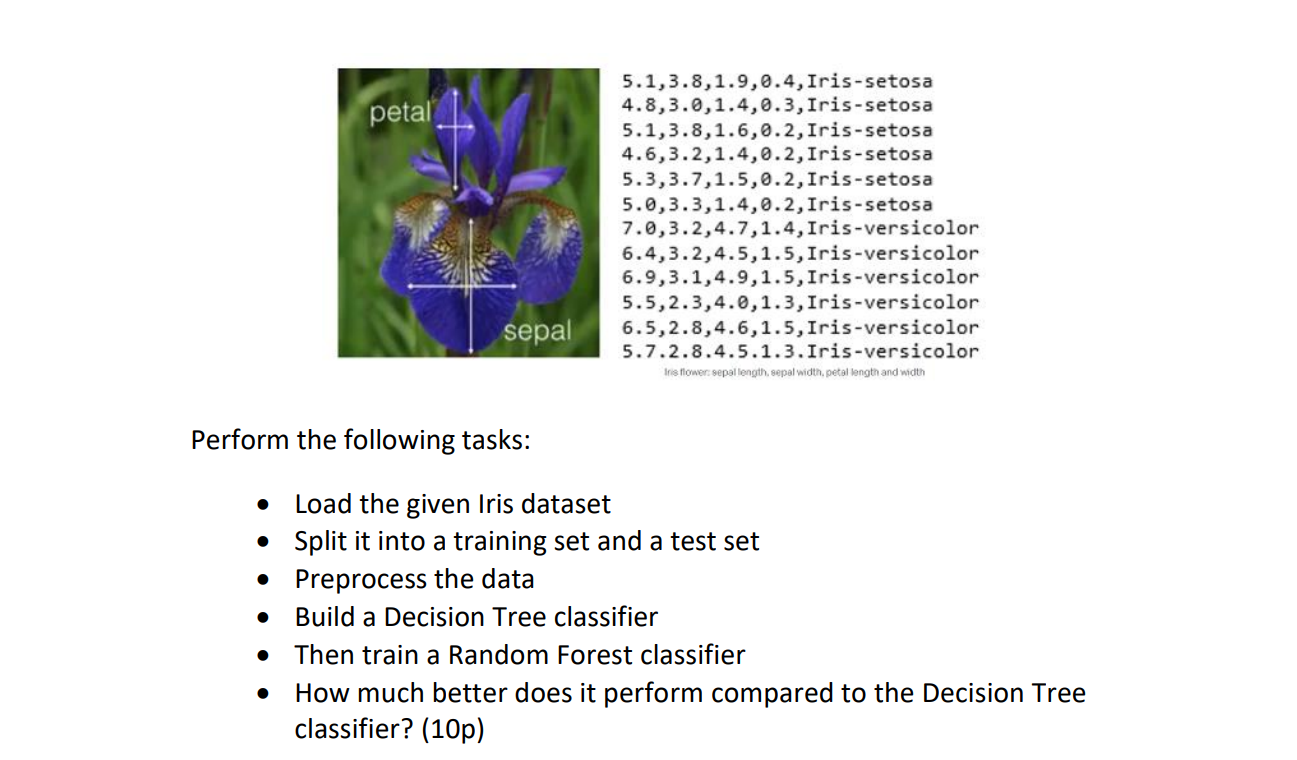

In [31]:
import numpy as np
import pandas as pd

## Load the Given Dataset

In [32]:
df = pd.read_csv("Iris.csv")

In [33]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
specie = df['Species'].unique()  # Extract the class names from the "Species" column of the backup DataFrame. Will be used later

In [35]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Encoded_Species'] = df['Species'].map(species_mapping)

In [36]:
df.drop(columns=['Species'], inplace=True)

In [37]:
df.drop(columns=['Id'], inplace=True)

In [38]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Row wise Randomization of dataset to shuffle 'Encoded_Species' column values

In [39]:
# The 'frac=1' argument means you're taking a fraction of 1, which shuffles all the rows.
# The 'reset_index' method is used to reset the index after shuffling.

shuffled_df = df.sample(frac=1).reset_index(drop=True)

In [40]:
shuffled_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,6.6,3.0,4.4,1.4,1
1,7.7,3.0,6.1,2.3,2
2,4.9,3.1,1.5,0.1,0
3,6.1,2.8,4.7,1.2,1
4,6.6,2.9,4.6,1.3,1
...,...,...,...,...,...
145,6.4,3.2,4.5,1.5,1
146,5.8,4.0,1.2,0.2,0
147,6.3,3.3,4.7,1.6,1
148,6.0,3.4,4.5,1.6,1


## Splitting to Training and Test Split

In [41]:
target = shuffled_df['Encoded_Species'].values

In [42]:
target

array([1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2])

In [43]:
feature_matrix_df = shuffled_df

In [44]:
feature_matrix_df.drop(columns="Encoded_Species", inplace=True)  # Remove the target column i.e. Encoded_species

In [45]:
feature_matrix_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.6,3.0,4.4,1.4
1,7.7,3.0,6.1,2.3
2,4.9,3.1,1.5,0.1
3,6.1,2.8,4.7,1.2
4,6.6,2.9,4.6,1.3
...,...,...,...,...
145,6.4,3.2,4.5,1.5
146,5.8,4.0,1.2,0.2
147,6.3,3.3,4.7,1.6
148,6.0,3.4,4.5,1.6


In [46]:
feature_matrix = feature_matrix_df.values

In [47]:
feature_matrix

array([[6.6, 3. , 4.4, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.1, 2.8, 4.7, 1.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 2.5, 3. , 1.1],
       [4.4, 3. , 1.3, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [7.3, 2.9, 6.3, 1.8],
       [4.8, 3. , 1.4, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5.9, 3. , 5.1, 1.8],
       [6.9, 3.2, 5.7, 2.3],
       [5.2, 3.5, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 2.8, 4. , 1.3],
       [6. , 2.9, 4.5, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6.3, 2.5, 4.9, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.8, 2

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.2, random_state=42)

# Explanation:
# - test_size is the fraction of the data to reserve for testing. You can adjust this value as needed.
# - random_state is used to ensure reproducibility. Setting it to a specific value will give you the same split each time you run the code.


In [50]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (120, 4)
Shape of y_train:  (120,)
Shape of X_test:  (30, 4)
Shape of y_test:  (30,)


## Data Preprocessing

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()  # Create an instance of the StandardScaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Use the same scaler to transform the testing data

## Build a Decision Tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [24]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)  # Train the Decision Tree classifier on the training data

y_pred_decision_tree = decision_tree.predict(X_test)  # Make predictions on the testing data

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

In [25]:
print(f"The accuracy of Decision Tree is: , {accuracy_decision_tree:.5f}")

The accuracy of Decision Tree is: , 0.90000


In [26]:
import matplotlib.pyplot as plt

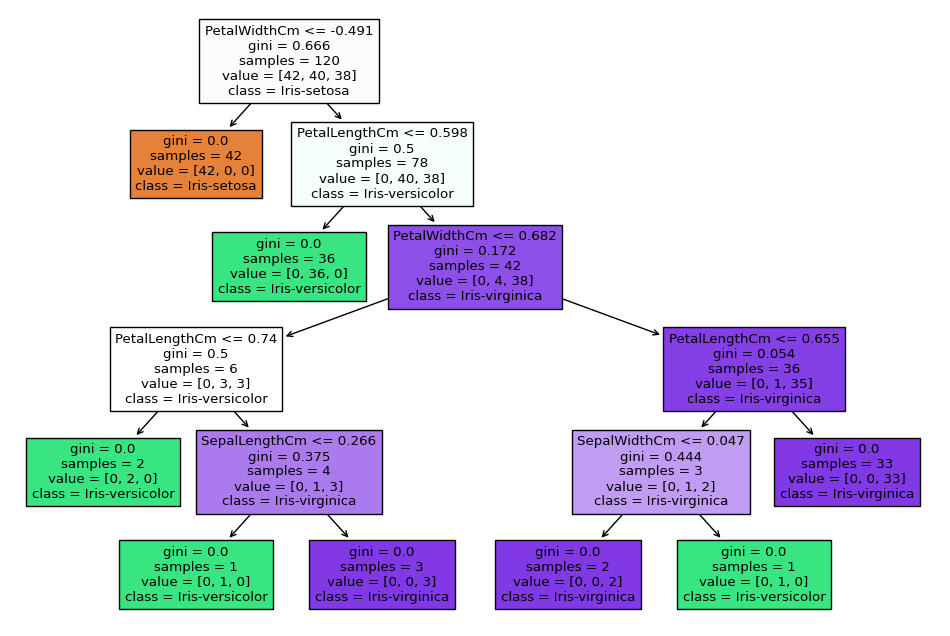

In [27]:
# Plot the decision tree

Feature_names = feature_matrix_df.columns  # Extract the feature names from the DataFrame

Class_names = specie

plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(decision_tree, filled=True, feature_names=Feature_names, class_names=Class_names)
plt.show()

## Then train a Random Forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [54]:
random_forest = RandomForestClassifier(n_estimators=50000, random_state=42)  # n_estimators is the total number of decision trees in the forest

random_forest.fit(X_train, y_train)  # Train the Random Forest classifier on the training data

y_pred_random_forest = random_forest.predict(X_test)  # Make predictions on the testing data

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

In [55]:
print(f"The accuracy of Random Forest is: , {accuracy_random_forest:.5f}")

The accuracy of Random Forest is: , 0.96667


In [56]:
import matplotlib.pyplot as plt

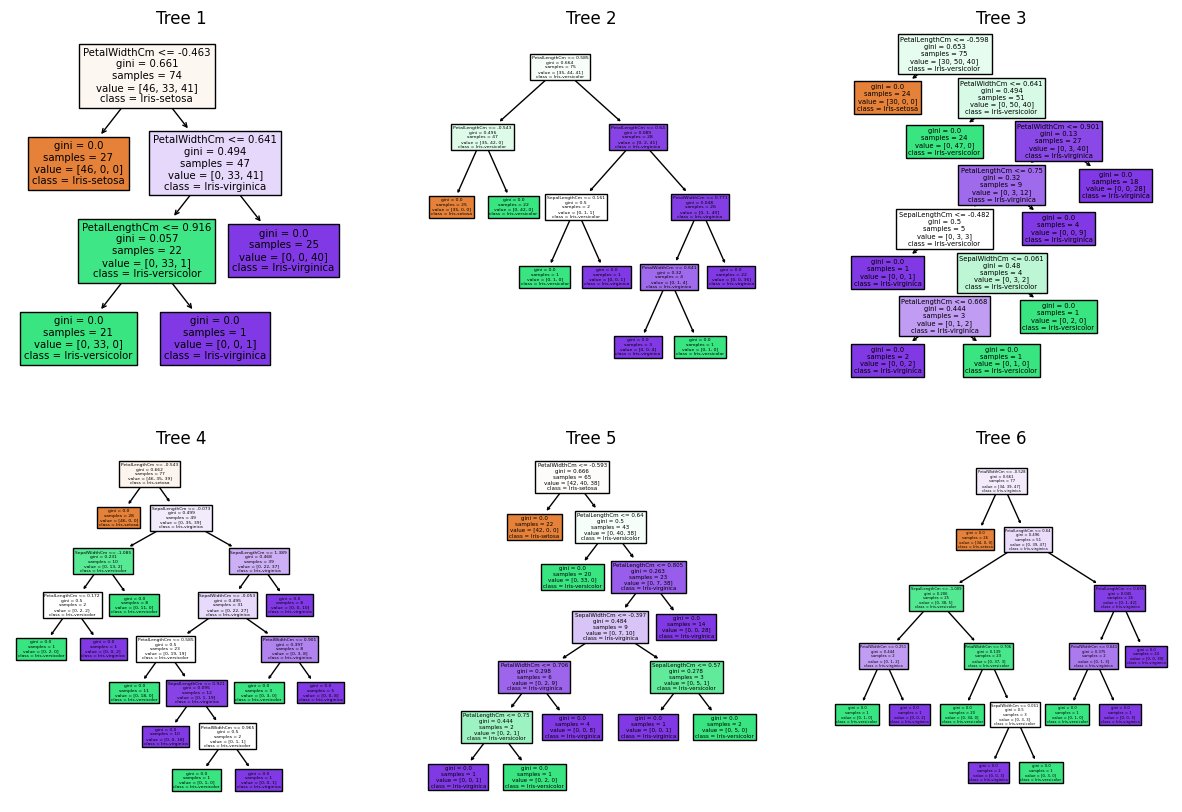

In [58]:
# Create a plot to display the first 6 decision trees in random forest

Feature_names = feature_matrix_df.columns  # Extract the feature names from the DataFrame

Class_names = specie

plt.figure(figsize=(15, 10))

# Iterate through the first 6 decision trees
for i in range(6):
    tree_to_plot = random_forest.estimators_[i]  # Select a specific decision tree from the Random Forest
    plt.subplot(2, 3, i + 1)  # Create a subplot (2 rows, 3 columns) for each tree
    plot_tree(tree_to_plot, filled=True, feature_names=Feature_names, class_names=Class_names)
    plt.title(f'Tree {i + 1}')

plt.show()

---

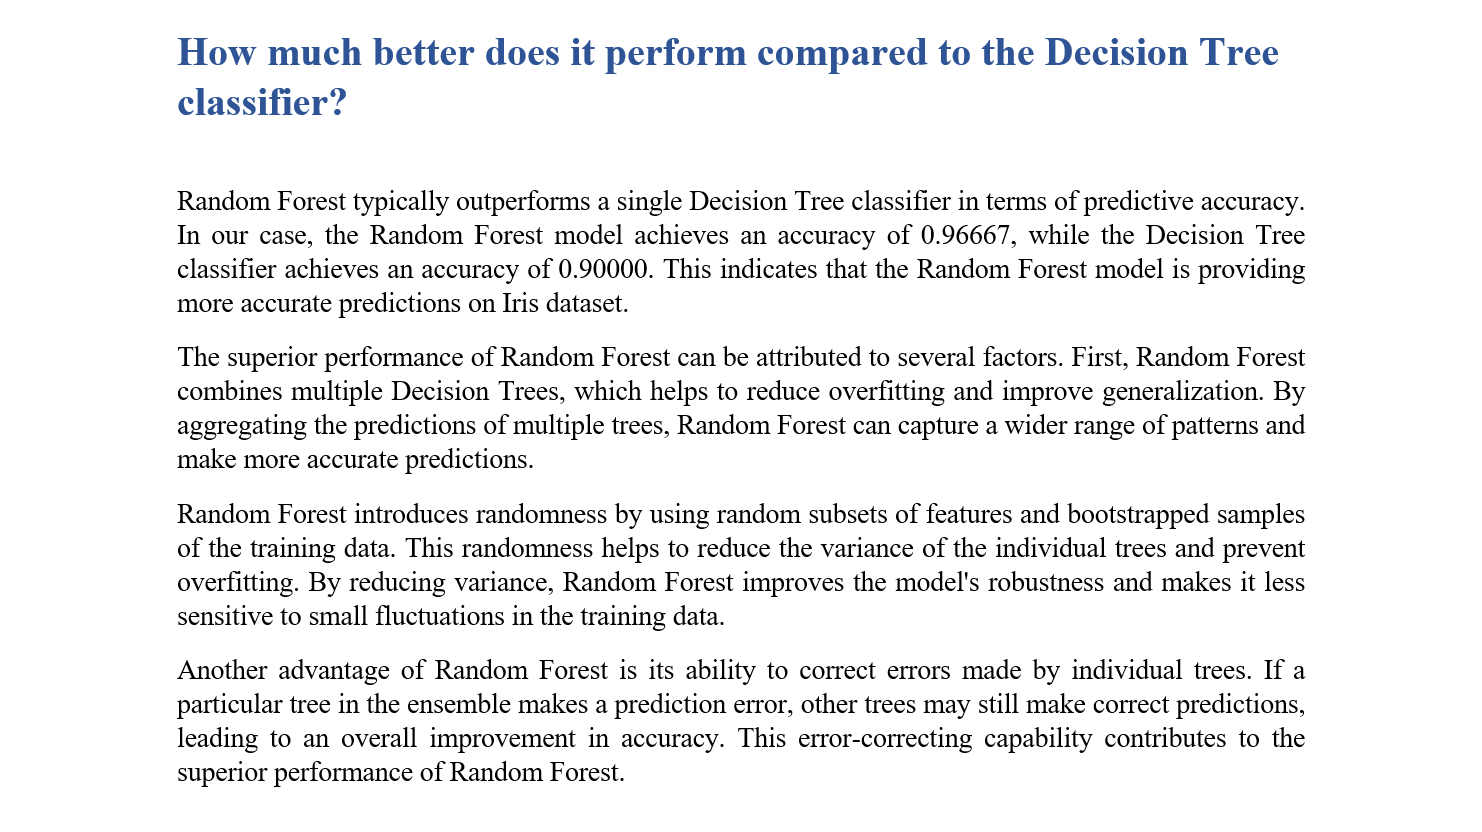